In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from IPython.core.display import HTML
from matplotlib.animation import FuncAnimation


In [2]:
def compute_error(w: float,
                  b: float,
                  x: npt.NDArray[np.float64],
                  y: npt.NDArray[np.float64]) -> float:
    '''
    Compute the mean squared error of the linear model.
    '''
    error = 0
    for i in range(len(x)):
        # f = (wx + b - y) ^ 2
        error += (w * x[i] + b - y[i]) ** 2
    return error


def step_gradient(w: float,
                  b: float,
                  x: npt.NDArray[np.float64],
                  y: npt.NDArray[np.float64],
                  lr: float) -> tuple[float, float]:
    '''
    Compute the gradient of the linear model.
    '''
    w_grad = 0
    b_grad = 0
    for i in range(len(x)):
        # ∂f/∂w = 2 * (wx + b - y) * x
        # ∂f/∂b = 2 * (wx + b - y)
        w_grad += 2 * (w * x[i] + b - y[i]) * x[i]
        b_grad += 2 * (w * x[i] + b - y[i])
    w -= lr * w_grad
    b -= lr * b_grad
    return w, b


In [3]:
# Load the selected features
y_raw = np.loadtxt('dataset/20151026_113_selected')
# y_raw.shape = (15,6)
x_raw = np.array(range(1, y_raw.shape[0] + 1))
# x_raw.shape = (15,)

# Normalize the data
y = (y_raw - y_raw.mean(axis=0)) / y_raw.std(axis=0)
x = (x_raw - x_raw.mean()) / x_raw.std()

# Initialize the parameters
w = np.zeros(y_raw.shape[1])
# w.shape = (6,)
b = np.zeros(y_raw.shape[1])
# b.shape = (6,)
error = np.array([compute_error(w[i], b[i], x, y[:, i])
                 for i in range(y.shape[1])])
# error.shape = (6,)

# Hyperparameters
lr = 1e-2
epochs = 10

# Initialize the arrays to store the errors and parameters
params = np.zeros((epochs + 1, 2, y.shape[1]))
errors = np.zeros((epochs + 1, y.shape[1]))
params[0] = w, b
errors[0] = error


In [4]:
# Train the model
for epoch in range(1, epochs + 1):
    for idx in range(y.shape[1]):

        # Update the parameters
        w[idx], b[idx] = step_gradient(w[idx], b[idx], x, y[:, idx], lr)

        # Compute the error
        error[idx] = compute_error(w[idx], b[idx], x, y[:, idx])

    # Store the parameters for animation
    params[epoch] = w, b
    errors[epoch] = error

    print(f'epoch: {epoch:2d}, error: {error[0]:.4f}, '
          f'w: {w[0]:.4f}, b: {b[0]:.4f}')


epoch:  1, error: 14.8416, w: 0.0432, b: 0.0000
epoch:  2, error: 14.7640, w: 0.0734, b: 0.0000
epoch:  3, error: 14.7260, w: 0.0945, b: 0.0000
epoch:  4, error: 14.7073, w: 0.1093, b: 0.0000
epoch:  5, error: 14.6982, w: 0.1197, b: 0.0000
epoch:  6, error: 14.6937, w: 0.1270, b: 0.0000
epoch:  7, error: 14.6916, w: 0.1320, b: 0.0000
epoch:  8, error: 14.6905, w: 0.1356, b: 0.0000
epoch:  9, error: 14.6900, w: 0.1381, b: 0.0000
epoch: 10, error: 14.6897, w: 0.1398, b: 0.0000


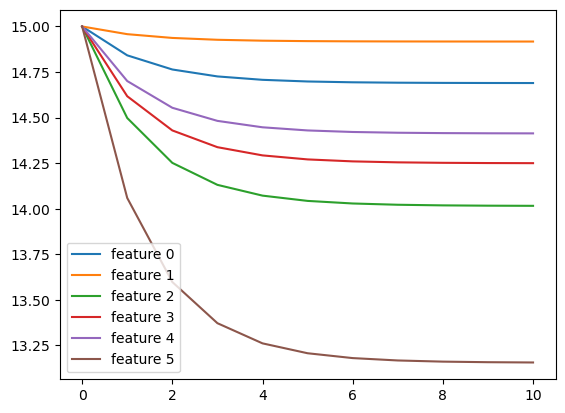

In [5]:
# Plot the errors
plt.plot(errors)
plt.legend([f'feature {i}' for i in range(y.shape[1])])
plt.show()


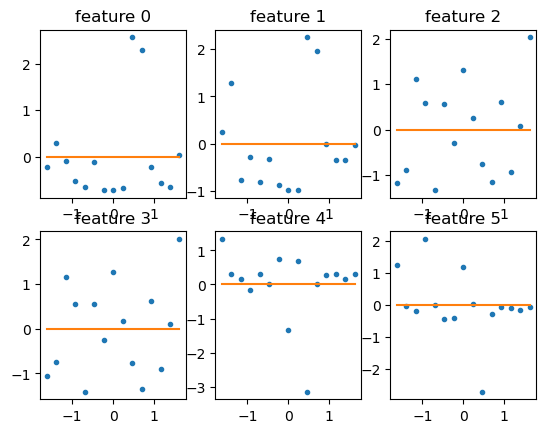

In [6]:
# Plot the linear models
fig, axs = plt.subplots(2, 3)


def update(t: int):
    '''
    Plot with the parameters at epoch t.
    '''
    w, b = params[t]
    for i in range(6):
        axs[i // 3, i % 3].cla()
        axs[i // 3, i % 3].plot(x, y[:, i], '.')
        axs[i // 3, i % 3].plot(x, w[i] * x + b[i])
        axs[i // 3, i % 3].set_title(f'feature {i}')


# Animate the plots
animation = FuncAnimation(fig, update, frames=epochs + 1, interval=100)

# Display the animation in the jupyter notebook
HTML(animation.to_jshtml())


In [7]:
# Predict
x_train = x_raw
x_train = (x_train - x_raw.mean()) / x_raw.std()
y_train_predict = np.array([w * x_train[i] + b for i in range(x_train.shape[0])])
y_train_predict = np.array([y_train_predict[i] * y_raw.std(axis=0) +
                            y_raw.mean(axis=0) for i in range(x_train.shape[0])])

x_test = np.array([16])
x_test = (x_test - x_raw.mean()) / x_raw.std()
y_test_predict = np.array([w * x_test[i] + b for i in range(x_test.shape[0])])
y_test_predict = np.array([y_test_predict[ i] * y_raw.std(axis=0) +
                           y_raw.mean(axis=0) for i in range(x_test.shape[0])])

print(f'x_test: {x_test}')
print(f'y_test: {y_test_predict}')

x_test: [1.8516402]
y_test: [[ 3.72180300e+04  3.27629142e+04  6.22541964e+04  6.18623791e+04
  -5.29229339e+01 -6.51288560e+01]]


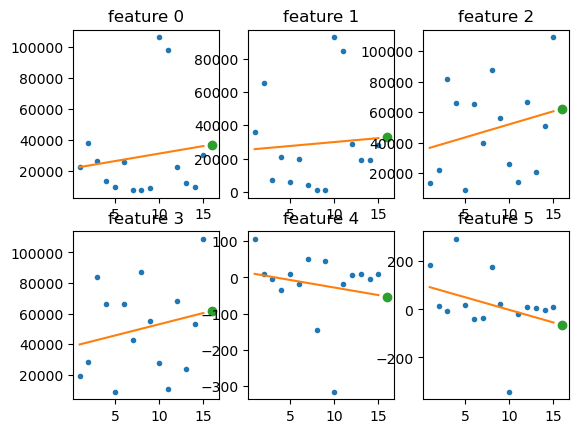

In [8]:
fig, axs = plt.subplots(2, 3)

for i in range(6):
    axs[i // 3, i % 3].plot(x_raw, y_raw[:, i], '.')
    axs[i // 3, i % 3].plot(x_raw, y_train_predict[:, i])
    axs[i // 3, i % 3].plot(16, y_test_predict[:, i], 'o')
    axs[i // 3, i % 3].set_title(f'feature {i}')